# 使用``gluon``的优化算法

* #### Momentum
* #### Nesterov
* #### Adagrad
* #### RMSprop
* #### Adadelta
* #### Adam

In [5]:
import mxnet as mx
import numpy as np

from mxnet import nd
from mxnet import gluon
from mxnet import autograd

%matplotlib inline 
import matplotlib as mlt
mlt.rcParams['figure.dpi'] = 120
import matplotlib.pyplot as plt

mx.random.seed(1)   
ctx = mx.cpu()

In [15]:
num_outputs = 1
num_examples = 1000
num_inputs = 2

true_w = [2.0, -3.4]
true_b = 4.2

X = nd.random.normal(shape=(num_examples, num_inputs))
y = true_w[0] * X[:, 0] + true_w[1] * X[:, 1] + true_b
y += .01 * nd.random.normal(shape=num_examples)

In [20]:
def train_mom(batch_size, lr, epochs, period, mom=0.9):
    assert period >= batch_size and period % batch_size == 0
    
    # 
    net = gluon.nn.Sequential()
    with net.name_scope():
        net.add(gluon.nn.Dense(1))
    net.initialize()
    
    # 
    square_loss = gluon.loss.L2Loss()
    trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': lr, 'momentum': mom})
    
    #
    data_iter = gluon.data.DataLoader(gluon.data.ArrayDataset(X, y), batch_size=batch_size, shuffle=True)
    
    #
    total_loss = [nd.mean(square_loss(net(X), y)).asnumpy()]
    for epoch in range(epochs):    
        for batch_i, (data, label) in enumerate(data_iter):
            with autograd.record():
                output = net(data)
                loss = square_loss(output, label)
            loss.backward()
            trainer.step(batch_size)
                
            if not batch_i * batch_size % period:
                total_loss.append(nd.mean(square_loss(net(X), y)).asnumpy())
                
        weight = net[0].weight.data()
        bias = net[0].bias.data()
        print("Epoch %d, lr : %s, Train loss : %s" % (epoch, lr, total_loss[-1]))
        print("weight : %s, bias : %s" % (weight.asnumpy(), bias.asnumpy()))
        
    xlabel = np.linspace(0, epochs, len(total_loss), endpoint=True)    
    plt.semilogy(xlabel, total_loss, color="b")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.grid(which='both')
    plt.show()

Epoch 0, lr : 0.1, Train loss : [ 0.00065499]
weight : [[ 1.97048032 -3.38721251]], bias : [ 4.18604088]
Epoch 1, lr : 0.1, Train loss : [  5.62148089e-05]
weight : [[ 1.99762285 -3.39725041]], bias : [ 4.19923115]
Epoch 2, lr : 0.1, Train loss : [  5.83748224e-05]
weight : [[ 2.00067091 -3.39791322]], bias : [ 4.19707489]


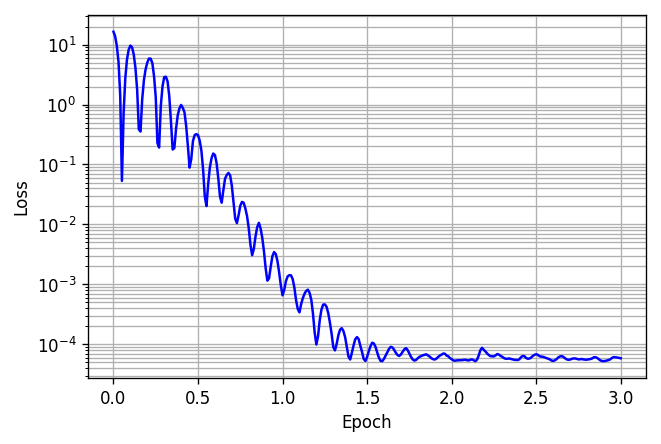

In [25]:
train_mom(batch_size=10, lr=0.1, epochs=3, period=10, mom=0.9)

In [26]:
def train_adagrad(batch_size, lr, epochs, period):
    assert period >= batch_size and period % batch_size == 0
    
    # 
    net = gluon.nn.Sequential()
    with net.name_scope():
        net.add(gluon.nn.Dense(1))
    net.initialize()
    
    # 
    square_loss = gluon.loss.L2Loss()
    trainer = gluon.Trainer(net.collect_params(), 'adagrad', {'learning_rate': lr})
    
    #
    data_iter = gluon.data.DataLoader(gluon.data.ArrayDataset(X, y), batch_size=batch_size, shuffle=True)
    
    #
    total_loss = [nd.mean(square_loss(net(X), y)).asnumpy()]
    for epoch in range(epochs):    
        for batch_i, (data, label) in enumerate(data_iter):
            with autograd.record():
                output = net(data)
                loss = square_loss(output, label)
            loss.backward()
            trainer.step(batch_size)
                
            if not batch_i * batch_size % period:
                total_loss.append(nd.mean(square_loss(net(X), y)).asnumpy())
                
        weight = net[0].weight.data()
        bias = net[0].bias.data()
        print("Epoch %d, lr : %s, Train loss : %s" % (epoch, lr, total_loss[-1]))
        print("weight : %s, bias : %s" % (weight.asnumpy(), bias.asnumpy()))
        
    xlabel = np.linspace(0, epochs, len(total_loss), endpoint=True)    
    plt.semilogy(xlabel, total_loss, color="b")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.grid(which='both')
    plt.show()

Epoch 0, lr : 0.9, Train loss : [  5.23539784e-05]
weight : [[ 2.00056791 -3.39888644]], bias : [ 4.19956875]
Epoch 1, lr : 0.9, Train loss : [  5.28099044e-05]
weight : [[ 2.0009582  -3.40033889]], bias : [ 4.20058107]
Epoch 2, lr : 0.9, Train loss : [  5.25791074e-05]
weight : [[ 1.99897444 -3.4007709 ]], bias : [ 4.20077658]


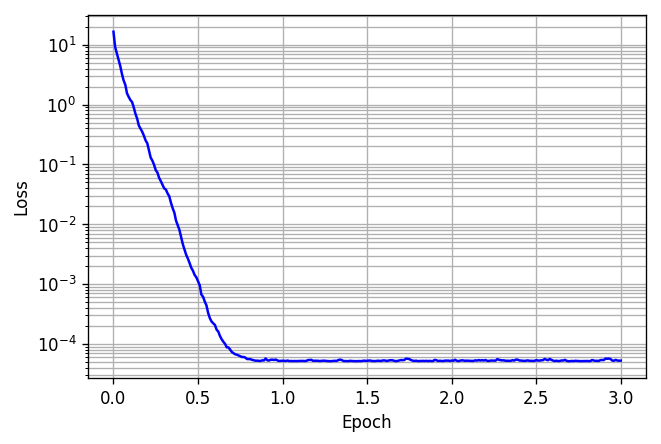

In [30]:
train_adagrad(batch_size=10, lr=0.9, epochs=3, period=10)

In [31]:
def train_rmsprop(batch_size, lr, gamma, epochs, period):
    assert period >= batch_size and period % batch_size == 0
    
    # 
    net = gluon.nn.Sequential()
    with net.name_scope():
        net.add(gluon.nn.Dense(1))
    net.initialize()
    
    # 
    square_loss = gluon.loss.L2Loss()
    trainer = gluon.Trainer(net.collect_params(), 'rmsprop', {'learning_rate': lr, 'gamma1': gamma})
    
    #
    data_iter = gluon.data.DataLoader(gluon.data.ArrayDataset(X, y), batch_size=batch_size, shuffle=True)
    
    #
    total_loss = [nd.mean(square_loss(net(X), y)).asnumpy()]
    for epoch in range(epochs):    
        for batch_i, (data, label) in enumerate(data_iter):
            with autograd.record():
                output = net(data)
                loss = square_loss(output, label)
            loss.backward()
            trainer.step(batch_size)
                
            if not batch_i * batch_size % period:
                total_loss.append(nd.mean(square_loss(net(X), y)).asnumpy())
                
        weight = net[0].weight.data()
        bias = net[0].bias.data()
        print("Epoch %d, lr : %s, Train loss : %s" % (epoch, lr, total_loss[-1]))
        print("weight : %s, bias : %s" % (weight.asnumpy(), bias.asnumpy()))
        
    xlabel = np.linspace(0, epochs, len(total_loss), endpoint=True)    
    plt.semilogy(xlabel, total_loss, color="b")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.grid(which='both')
    plt.show()

Epoch 0, lr : 0.03, Train loss : [ 1.17068088]
weight : [[ 1.80199277 -2.57063818]], bias : [ 2.920928]
Epoch 1, lr : 0.03, Train loss : [  7.77522873e-05]
weight : [[ 2.00404787 -3.39790916]], bias : [ 4.1947732]
Epoch 2, lr : 0.03, Train loss : [  9.05936758e-05]
weight : [[ 2.00613976 -3.40356612]], bias : [ 4.19581795]


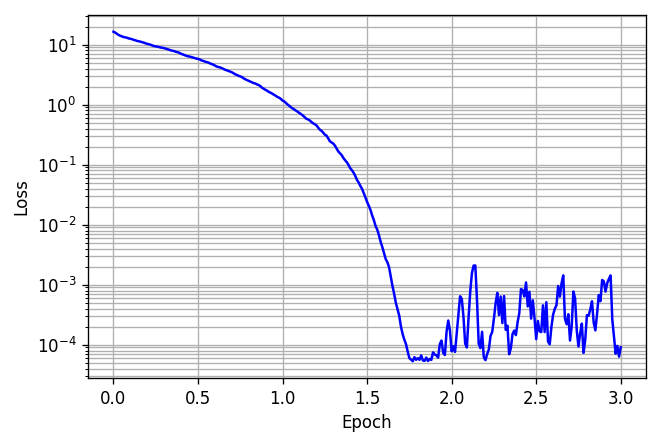

In [35]:
train_rmsprop(batch_size=10, lr=0.03, gamma=0.9, epochs=3, period=10)

In [36]:
def train_adadelta(batch_size, lr, rho, epochs, period):
    assert period >= batch_size and period % batch_size == 0
    
    # 
    net = gluon.nn.Sequential()
    with net.name_scope():
        net.add(gluon.nn.Dense(1))
    net.initialize()
    
    # 
    square_loss = gluon.loss.L2Loss()
    trainer = gluon.Trainer(net.collect_params(), 'adadelta', {'learning_rate': lr, 'rho': rho})
    
    #
    data_iter = gluon.data.DataLoader(gluon.data.ArrayDataset(X, y), batch_size=batch_size, shuffle=True)
    
    #
    total_loss = [nd.mean(square_loss(net(X), y)).asnumpy()]
    for epoch in range(epochs):    
        for batch_i, (data, label) in enumerate(data_iter):
            with autograd.record():
                output = net(data)
                loss = square_loss(output, label)
            loss.backward()
            trainer.step(batch_size)
                
            if not batch_i * batch_size % period:
                total_loss.append(nd.mean(square_loss(net(X), y)).asnumpy())
                
        weight = net[0].weight.data()
        bias = net[0].bias.data()
        print("Epoch %d, lr : %s, Train loss : %s" % (epoch, lr, total_loss[-1]))
        print("weight : %s, bias : %s" % (weight.asnumpy(), bias.asnumpy()))
        
    xlabel = np.linspace(0, epochs, len(total_loss), endpoint=True)    
    plt.semilogy(xlabel, total_loss, color="b")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.grid(which='both')
    plt.show()

Epoch 0, lr : 0.9, Train loss : [  8.32628139e-05]
weight : [[ 1.99912882 -3.39656091]], bias : [ 4.19286776]
Epoch 1, lr : 0.9, Train loss : [  5.15172578e-05]
weight : [[ 1.99930024 -3.39912891]], bias : [ 4.20021725]
Epoch 2, lr : 0.9, Train loss : [  5.16011496e-05]
weight : [[ 1.99947047 -3.39910674]], bias : [ 4.19983673]


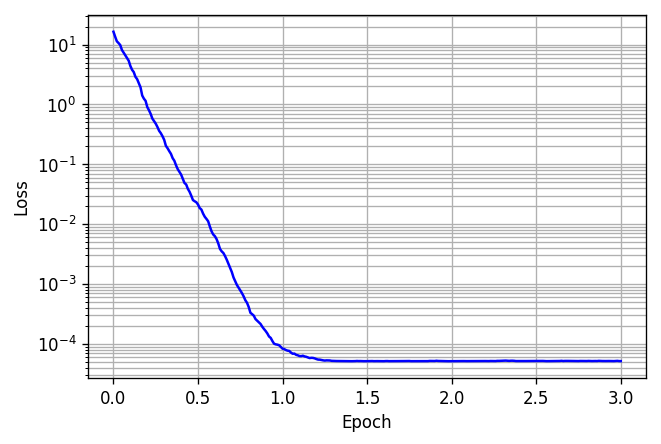

In [42]:
train_adadelta(batch_size=10, lr=0.9, rho=0.9999, epochs=3, period=10)

In [43]:
def train_adam(batch_size, lr, epochs, period):
    assert period >= batch_size and period % batch_size == 0
    
    # 
    net = gluon.nn.Sequential()
    with net.name_scope():
        net.add(gluon.nn.Dense(1))
    net.initialize()
    
    # 
    square_loss = gluon.loss.L2Loss()
    trainer = gluon.Trainer(net.collect_params(), 'adam', {'learning_rate': lr})
    
    #
    data_iter = gluon.data.DataLoader(gluon.data.ArrayDataset(X, y), batch_size=batch_size, shuffle=True)
    
    #
    total_loss = [nd.mean(square_loss(net(X), y)).asnumpy()]
    for epoch in range(epochs):    
        for batch_i, (data, label) in enumerate(data_iter):
            with autograd.record():
                output = net(data)
                loss = square_loss(output, label)
            loss.backward()
            trainer.step(batch_size)
                
            if not batch_i * batch_size % period:
                total_loss.append(nd.mean(square_loss(net(X), y)).asnumpy())
                
        weight = net[0].weight.data()
        bias = net[0].bias.data()
        print("Epoch %d, lr : %s, Train loss : %s" % (epoch, lr, total_loss[-1]))
        print("weight : %s, bias : %s" % (weight.asnumpy(), bias.asnumpy()))
        
    xlabel = np.linspace(0, epochs, len(total_loss), endpoint=True)    
    plt.semilogy(xlabel, total_loss, color="b")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.grid(which='both')
    plt.show()

Epoch 0, lr : 0.1, Train loss : [ 0.00116491]
weight : [[ 2.00244832 -3.4312005 ]], bias : [ 4.23560715]
Epoch 1, lr : 0.1, Train loss : [  5.27449229e-05]
weight : [[ 1.99962401 -3.40109301]], bias : [ 4.20024157]
Epoch 2, lr : 0.1, Train loss : [  5.17845147e-05]
weight : [[ 1.99952769 -3.39858913]], bias : [ 4.20039511]


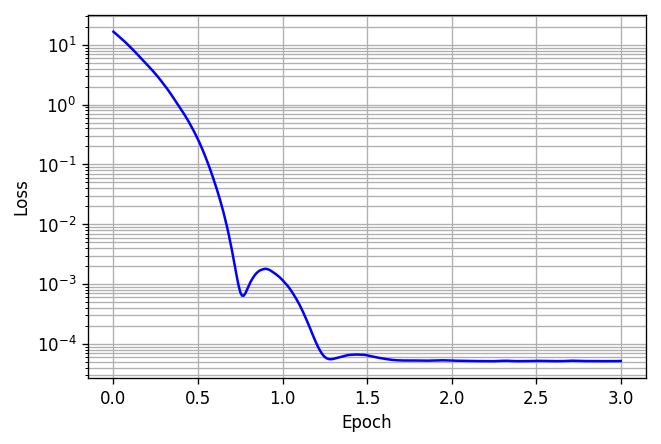

In [44]:
train_adam(batch_size=10, lr=0.1, epochs=3, period=10)

In [46]:
def train_nag(batch_size, lr, epochs, period):
    assert period >= batch_size and period % batch_size == 0
    
    # 
    net = gluon.nn.Sequential()
    with net.name_scope():
        net.add(gluon.nn.Dense(1))
    net.initialize()
    
    # 
    square_loss = gluon.loss.L2Loss()
    trainer = gluon.Trainer(net.collect_params(), 'nag', {'learning_rate': lr})
    
    #
    data_iter = gluon.data.DataLoader(gluon.data.ArrayDataset(X, y), batch_size=batch_size, shuffle=True)
    
    #
    total_loss = [nd.mean(square_loss(net(X), y)).asnumpy()]
    for epoch in range(epochs):    
        for batch_i, (data, label) in enumerate(data_iter):
            with autograd.record():
                output = net(data)
                loss = square_loss(output, label)
            loss.backward()
            trainer.step(batch_size)
                
            if not batch_i * batch_size % period:
                total_loss.append(nd.mean(square_loss(net(X), y)).asnumpy())
                
        weight = net[0].weight.data()
        bias = net[0].bias.data()
        print("Epoch %d, lr : %s, Train loss : %s" % (epoch, lr, total_loss[-1]))
        print("weight : %s, bias : %s" % (weight.asnumpy(), bias.asnumpy()))
        
    xlabel = np.linspace(0, epochs, len(total_loss), endpoint=True)    
    plt.semilogy(xlabel, total_loss, color="b")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.grid(which='both')
    plt.show()

Epoch 0, lr : 0.1, Train loss : [  5.18675624e-05]
weight : [[ 1.99914563 -3.39865279]], bias : [ 4.20063829]
Epoch 1, lr : 0.1, Train loss : [  5.23794588e-05]
weight : [[ 1.99844384 -3.39869881]], bias : [ 4.20000219]
Epoch 2, lr : 0.1, Train loss : [  5.15652937e-05]
weight : [[ 1.99986064 -3.39938569]], bias : [ 4.19987583]


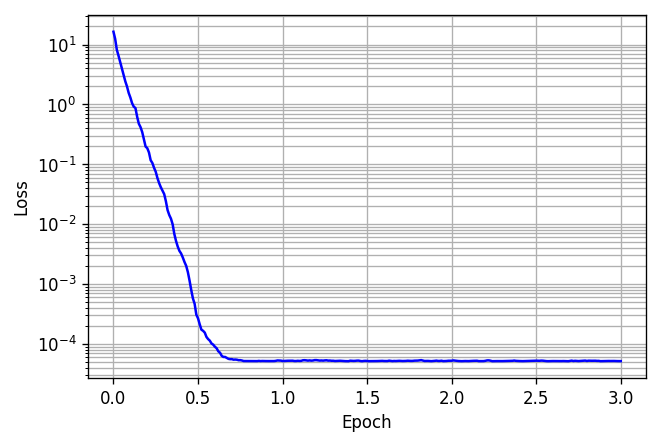

In [47]:
train_nag(batch_size=10, lr=0.1, epochs=3, period=10)